# **Pneumonia Detection**

program ini berfungsi untuk mendeteksi keberadaan penyakit pneumonia dari sebuah gambar scan paru-paru

# **Get Data**

kode dibawah mendapatkan data scan paru-paru pneumonia

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rscbjbr9sj-3.zip

--2021-07-08 07:01:50--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rscbjbr9sj-3.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.62.152
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.62.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8432836958 (7.9G) [application/octet-stream]
Saving to: ‘rscbjbr9sj-3.zip’

rscbjbr9sj-3.zip    100%[===================>]   7.85G  29.2MB/s    in 4m 34s  

2021-07-08 07:06:25 (29.3 MB/s) - ‘rscbjbr9sj-3.zip’ saved [8432836958/8432836958]



ekstrak file 

In [ ]:
from zipfile import ZipFile
nama_file = 'rscbjbr9sj-3.zip'

with ZipFile(nama_file, 'r') as zip:
  zip.extractall()
  print('selesai1')

nama_file = 'ZhangLabData.zip'

with ZipFile(nama_file, 'r') as zip:
  zip.extractall()
  print('selesai2')

selesai1
selesai2


In [ ]:
import os

img_folder_path = '/content/CellData/chest_xray/train/NORMAL'
dirListing = os.listdir(img_folder_path)

print(len(dirListing))

1349


Split training data dan test data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2) # splitting data

In [ ]:
train_generator = train_datagen.flow_from_directory(
        "/content/CellData/chest_xray/train",
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical',
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        "/content/CellData/chest_xray/train", 
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        subset='validation')

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


# **Train Model**

Buat Model

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

Compile Model


In [ ]:
model.compile(loss = 'binary_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

fungsi callback selesai di 98%

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >98%!")
      self.model.stop_training = True
callbacks = myCallback()

train model

In [ ]:
# latih model dengan model.fit 
history = model.fit(
      train_generator, 
      steps_per_epoch=30,
      epochs=30, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2,
      callbacks=callbacks)

Epoch 1/30
30/30 - 12s - loss: 0.8026 - accuracy: 0.7583 - val_loss: 1.8563 - val_accuracy: 0.6500
Epoch 2/30
30/30 - 11s - loss: 0.7483 - accuracy: 0.6917 - val_loss: 0.6799 - val_accuracy: 0.6000
Epoch 3/30
30/30 - 11s - loss: 0.6730 - accuracy: 0.7583 - val_loss: 0.6064 - val_accuracy: 0.7000
Epoch 4/30
30/30 - 11s - loss: 0.6208 - accuracy: 0.7167 - val_loss: 0.5680 - val_accuracy: 0.7500
Epoch 5/30
30/30 - 11s - loss: 0.6302 - accuracy: 0.7917 - val_loss: 0.4292 - val_accuracy: 0.8500
Epoch 6/30
30/30 - 11s - loss: 0.5960 - accuracy: 0.7250 - val_loss: 5.7847 - val_accuracy: 0.6500
Epoch 7/30
30/30 - 11s - loss: 0.8011 - accuracy: 0.7083 - val_loss: 0.6865 - val_accuracy: 0.7000
Epoch 8/30
30/30 - 11s - loss: 0.6729 - accuracy: 0.7833 - val_loss: 0.6978 - val_accuracy: 0.6000
Epoch 9/30
30/30 - 11s - loss: 0.7440 - accuracy: 0.7143 - val_loss: 0.5427 - val_accuracy: 0.8500
Epoch 10/30
30/30 - 11s - loss: 0.6146 - accuracy: 0.7417 - val_loss: 1.5573 - val_accuracy: 0.7000
Epoch 11/

kode di bawah ini untuk melihat performa model

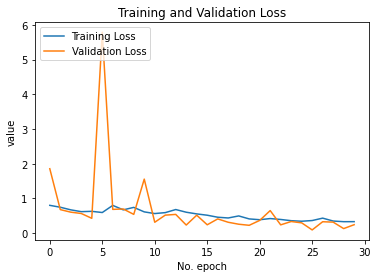

In [ ]:
from matplotlib import pyplot as plt

# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

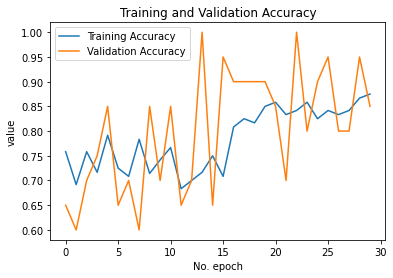

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# **Test Model menggunakan input**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

if classes[0][0] == 1 :
  print("jawaban : normal")
else:
  print("jawaban : pneumonia")

# **Konversi Model**

convert model

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()


INFO:tensorflow:Assets written to: /tmp/tmpxz6w8qlu/assets


save model

In [ ]:
# with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  # f.write(tflite_model)